In [1]:
import pandas as pd
import numpy as np
import altair as alt
#from vega_datasets import data

## Initial Analysis

### Load in the data and get a very general sense of what it's about

In [2]:
full_data_df = pd.read_csv('fraudfile.csv')

full_data_df.describe()

full_data_df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

### There's a column of labels for fraud lets see how many counts of fraud we have

In [3]:
fraud_count = sum(full_data_df['isFraud'])
fraud_count

8213

### Since the dataset is so large what percent of transaction are fraud?

In [4]:
fraud_count/len(full_data_df)

0.001290820448180152

### That's only about 1/10th of 1% so most transactions are legit. However since the data is so large we'll have to isolate fraudulent transactions to understand them better.

In [5]:
frauds_only = full_data_df[full_data_df['isFraud'] == 1]
frauds_only

step      type      amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
251         1  TRANSFER     2806.00  C1420196421        2806.00   
252         1  CASH_OUT     2806.00  C2101527076        2806.00   
680         1  TRANSFER    20128.00   C137533655       20128.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                   0.0   C553264065            0.00            0.00        1   
3                   0.0    C38997010        21182.00            0.00        1   
251                 0.0   C972765878            0.00            0.00        1   
252                 0.0  C1007251739        26202.00            0.00        1   
680                 0.0  C1848415041            0.00            0.00        1   
...                 ...          ...             ...             ...      ...   
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
2                     0  
3                     0  
251                   0  
252                   0  
680                   0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[8213 rows x 11 columns]

### Let's see what we can learn from a describe statement about the data

In [6]:
frauds_only.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  8213.000000  8.213000e+03   8.213000e+03    8.213000e+03   
mean    368.413856  1.467967e+06   1.649668e+06    1.923926e+05   
std     216.388690  2.404253e+06   3.547719e+06    1.965666e+06   
min       1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%     181.000000  1.270913e+05   1.258224e+05    0.000000e+00   
50%     367.000000  4.414234e+05   4.389835e+05    0.000000e+00   
75%     558.000000  1.517771e+06   1.517771e+06    0.000000e+00   
max     743.000000  1.000000e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count    8.213000e+03    8.213000e+03   8213.0     8213.000000  
mean     5.442496e+05    1.279708e+06      1.0        0.001948  
std      3.336421e+06    3.908817e+06      0.0        0.044097  
min      0.000000e+00    0.000000e+00      1.0        0.000000  
25%      0.000000e+00    0.000000e+00      1.0        0.000000  
50%      0.000000e+00    4.676420e+03      1.0        0.000000  
75%      1.478287e+05    1.058725e+06      1.0        0.000000  
max      2.362305e+08    2.367265e+08      1.0        1.000000

#### The mean amount is:

In [7]:
frauds_only.describe()['amount']['mean']

1467967.299140387

#### How does that compare to the mean amount of the total dataset?

In [8]:
print("Frauds mean amount: " + str(frauds_only.describe()['amount']['mean']))
print("All data mean amount: " + str(full_data_df.describe()['amount']['mean']))


Frauds mean amount: 1467967.299140387
All data mean amount: 179861.90354912292


### So fraud transaction have nearly 10x the mean amount of non-fraud transactions, What about the balances before and after the transaction for the originating account and destination accounts?

##### Originating

In [9]:
#Old Originating
print("Frauds originating account balance before transaction: " + str(frauds_only.describe()['oldbalanceOrg']['mean']))
print("All data originating account balance before transaction: " + str(full_data_df.describe()['oldbalanceOrg']['mean']))
print('\n')

#New Originating
print("Frauds originating account balance after transaction: " + str(frauds_only.describe()['newbalanceOrig']['mean']))
print("All data originating account balance after transaction: " + str(full_data_df.describe()['newbalanceOrig']['mean']))

Frauds originating account balance before transaction: 1649667.6057116783
All data originating account balance before transaction: 833883.1040744851


Frauds originating account balance after transaction: 192392.63183611343
All data originating account balance after transaction: 855113.6685785672


##### Destination

In [10]:
#Old Destination
print("Frauds destination account balance before transaction: " + str(frauds_only.describe()['oldbalanceDest']['mean']))
print("All data destination account balance before transaction: " + str(full_data_df.describe()['oldbalanceDest']['mean']))
print('\n')

#New Destination
print("Frauds destination account balance after transaction: " + str(frauds_only.describe()['newbalanceDest']['mean']))
print("All data destination account balance after transaction: " + str(full_data_df.describe()['newbalanceDest']['mean']))

Frauds destination account balance before transaction: 544249.6190746377
All data destination account balance before transaction: 1100701.6665196999


Frauds destination account balance after transaction: 1279707.6171459865
All data destination account balance after transaction: 1224996.3982020712


#### Fraudulent accounts where transactions are originating have higher balances overall, but when looking at destination accounts fraudulent destination acount balances before are less than half those of the data average, and after are actually larger than the data average!

### How often is fraud flagged as fraud?

In [11]:
true_positive_frauds = sum(frauds_only['isFlaggedFraud'])
true_positive_frauds

16

In [12]:
print("Percent of Fraud transactions flagged as Fraud: " + str((true_positive_frauds/len(frauds_only)) * 100) + "%")

Percent of Fraud transactions flagged as Fraud: 0.1948131011810544%


#### Only 16 fraudulent instances were flagged accurately as fraud, that's only 0.2%, a pretty lousy hit rate

#### How many were flagged in the among all the transactions?

In [13]:
all_data_frauds = sum(full_data_df['isFlaggedFraud'])
all_data_frauds

16

#### So there were no false positives present among the fraud flag but, it needs to be better at detecting fraud. 

### What is the break down of tranaction types among the data?

In [14]:
print("Counts of each transaction type:")
full_data_df.groupby('type').size()

Counts of each transaction type:


type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
dtype: int64

### What about among transactions flagged as fraud?

In [15]:
print("Counts of each transaction type for fraudulent transactions:")
frauds_only.groupby('type').size()
#trans_types_full = full_data_df.groupby('type').sum()

Counts of each transaction type for fraudulent transactions:


type
CASH_OUT    4116
TRANSFER    4097
dtype: int64

#### All fraudulent transactions are either cash outs or transfers, so we may want to focus on these types.

### Are fraud transactions from accounts conducting any legitimate transactions?

##### Common originating account names between legitimate and fraudulent transactions

In [16]:
fraud_account_names = frauds_only['nameOrig']
fraud_account_names

legitimate_transactions = full_data_df[full_data_df['isFraud'] != 1]
legit_account_names = legitimate_transactions['nameOrig']

fraud_names_set = set(fraud_account_names)
intersection = fraud_names_set.intersection(legit_account_names)
intersection_list = list(intersection)

print(intersection_list)

['C570470570', 'C1863683348', 'C1882162040', 'C1498185758', 'C803411135', 'C2004363483', 'C1885333477', 'C1044518032', 'C876181265', 'C1015856166', 'C1191696703', 'C1899367925', 'C483009518', 'C850961884', 'C471097879', 'C10982843', 'C635739031', 'C929585215', 'C432562518', 'C171834973', 'C1127304441', 'C1118399210', 'C1851065642', 'C686187434', 'C812001868', 'C1627918307', 'C431038121', 'C357911107']


##### Common destination account names between legitimate and fraudulent transactions

In [17]:
fraud_dest_account_names = frauds_only['nameDest']
legit_dest_account_names = legitimate_transactions['nameDest']

fraud_dest_names_set = set(fraud_dest_account_names)
dest_intersection = fraud_dest_names_set.intersection(legit_dest_account_names)
dest_intersection_list = list(dest_intersection)

print(len(dest_intersection_list))


5492


#### There are 5492 destination accounts with both fraudulent transactions and legitimate ones

### How large are transactions of different types?

In [18]:
alt.data_transformers.enable('default', max_rows=50000)

alt.Chart(frauds_only).mark_circle(size=50).encode(
    x='amount',
    y='oldbalanceDest',
    color='type',
)

alt.Chart(...)

##### Transfer frauds seem to occur only where there the old balance of the destination account is low, whereas cashing out is the preferred method for large amounts

In [19]:
alt.data_transformers.enable('default', max_rows=50000)

alt.Chart(frauds_only).mark_circle(size=50).encode(
    x='amount',
    y='newbalanceDest',
    color='type',
)

alt.Chart(...)

##### Cash out frauds drain the account balance of the originating account to 0, whereas transfers are generally used to move larger sums of money and keep the existing account intact

In [20]:
alt.Chart(frauds_only).mark_circle(size=10).encode(
    x='step',
    y='amount',
    color='type',
)

alt.Chart(...)

### Repeating Account Names

In [21]:
frauds_only['nameOrig'].value_counts()

C1471998742    1
C328021152     1
C857672087     1
C1855947267    1
C1023402674    1
              ..
C82999164      1
C1151172465    1
C2086908548    1
C1961506277    1
C919387676     1
Name: nameOrig, Length: 8213, dtype: int64

In [22]:
frauds_only['nameDest'].value_counts()

C200064275     2
C14138104      2
C2129197098    2
C803116137     2
C904300960     2
              ..
C667043624     1
C2110724119    1
C1818028349    1
C1008141615    1
C2110832776    1
Name: nameDest, Length: 8169, dtype: int64

## Generating Features 

### Merchant vs. Consumer

#### The letter at the beginning of the account name indicates whether the account belongs to consumer or a merchant so lets separate out that indicator

In [23]:
full_data_df['OrigType'] = full_data_df['nameOrig'].apply(lambda x: x[0])
full_data_df['DestType'] = full_data_df['nameDest'].apply(lambda x: x[0])

In [24]:
full_data_df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud OrigType DestType  
0                     0        C        M  
1                     0        C        M  
2                     0        C        C  
3                     0        C        C  
4                     0        C        M  
...                 ...      ...      ...  
6362615               0        C        C  
6362616               0        C        C  
6362617               0        C        C  
6362618               0        C        C  
6362619               0        C        C  

[6362620 rows x 13 columns]

### Zero in Zero out

#### We can see even from the head of the data that many of the account destinations that are fraudulent have a 0 account balance before and after, suggesting this is either a null value or an error. Since this is common in fraud accounts lets note it with a feature.

In [25]:
full_data_df['ZeroInZeroOut'] = np.where((full_data_df['oldbalanceDest'] == 0 ) & (full_data_df['newbalanceDest']==0), 1, 0 )

full_data_df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud OrigType DestType  ZeroInZeroOut  
0                     0        C        M              1  
1                     0        C        M              1  
2                     0        C        C              1  
3                     0        C        C              0  
4                     0        C        M              1  
...                 ...      ...      ...            ...  
6362615               0        C        C              0  
6362616               0        C        C              1  
6362617               0        C        C              0  
6362618               0        C        C              1  
6362619               0        C        C              0  

[6362620 rows x 14 columns]

### Transaction amounts 

#### Similar to the concept of Benford's law, fraudulent transactions amount may have a different distribution than regular ones. Certain numbers may appear repeatedly or disproportionately. Let's see how often a specific transaction amount appears 

In [26]:

frauds_only['amount'].value_counts()


10000000.00    287
0.00            16
1165187.89       4
429257.45        4
3242183.64       2
              ... 
7316255.05       1
234377.29        1
42062.82         1
3441041.46       1
4892193.09       1
Name: amount, Length: 3977, dtype: int64

#### We see an unusually high number of exactly 10000000 dollar transactions.

In [27]:
(287/len(frauds_only)) * 100

3.4944600024351637

#### 3.4% of all fraud transaction amounts are exactly 10000000 dollars

In [28]:
legitimate_transactions['amount'].value_counts()

10000000.00    2920
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
444010.27         1
63893.29          1
1253351.92        1
371685.54         1
223098.05         1
Name: amount, Length: 5313650, dtype: int64

In [29]:
(2920/len(legitimate_transactions)) * 100

0.045952360306791805

#### While 1000000 is still the most common amount the proportions are much different. Less than .05% of all legitimate transactions are exactly 1000000. The same is true of 0 dollar transactions.

### Million or 0 flag

#### To capture this behavior lets make two separate features one for a million dollar transaction amount and one for a 0 dollar transaction amount.

In [30]:
full_data_df['millionAmount'] = np.where(full_data_df['amount'] == 10000000, 1, 0 )

full_data_df['millionAmount'].sum()


3207

In [31]:
full_data_df['zeroAmount'] = np.where(full_data_df['amount'] == 0, 1, 0 )

full_data_df['zeroAmount'].sum()


16

### Balance amount flags

#### If this is true of amounts it is likely also true of balances lets look at the old balance of originating and destination account involved in fraduulent transactions

In [32]:

frauds_only['oldbalanceOrg'].value_counts()


10000000.00    142
0.00            41
429257.45        4
1165187.89       4
619824.64        2
              ... 
33441041.46      1
32542664.27      1
34953893.08      1
19593838.63      1
13576297.10      1
Name: oldbalanceOrg, Length: 4094, dtype: int64

In [33]:
legitimate_transactions['oldbalanceOrg'].value_counts()


0.00          2102408
184.00            918
133.00            914
195.00            912
109.00            908
               ...   
1501.75             1
259394.44           1
2021369.55          1
409093.56           1
102899.11           1
Name: oldbalanceOrg, Length: 1841867, dtype: int64

#### Again this ten million number is coming up, let's keep track of it with a feature.

In [34]:
full_data_df['tenmilOrig'] = np.where(full_data_df['oldbalanceOrg'] == 10000000, 1, 0 )

full_data_df['tenmilOrig'].sum()

142

#### How about for new balances?

In [35]:
frauds_only['newbalanceOrig'].value_counts()

0.00           8053
19585040.37       3
17316255.05       3
10399045.08       3
3576297.10        2
               ... 
6484526.80        1
1975271.77        1
3019699.77        1
13441041.46       1
3120690.98        1
Name: newbalanceOrig, Length: 145, dtype: int64

In [36]:
legitimate_transactions['newbalanceOrig'].value_counts()

0.00          3601513
19220.18            4
9226.55             4
23400.82            4
26099.09            4
               ...   
729615.29           1
2198940.26          1
148127.11           1
2710446.26          1
102899.11           1
Name: newbalanceOrig, Length: 2682442, dtype: int64

#### There doesn't seem to be the same pattern there other than lots of 0s

In [37]:
frauds_only['newbalanceDest'].value_counts()

0.00           4091
10000000.00      53
1165187.89        2
127905.82         2
1064995.85        2
               ... 
2435960.09        1
8911464.74        1
441127.69         1
3485139.96        1
86002.09          1
Name: newbalanceDest, Length: 4067, dtype: int64

In [38]:
legitimate_transactions['newbalanceDest'].value_counts()


0.00           2435342
971418.91           32
19169204.93         29
1254956.07          25
16532032.16         25
                ...   
2470356.55           1
5403883.56           1
1992980.00           1
1480089.29           1
420464.55            1
Name: newbalanceDest, Length: 3552702, dtype: int64

#### Nothing there either. It seems like ten million is a special number for fraud.

In [39]:
full_data_df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud OrigType DestType  ZeroInZeroOut  millionAmount  \
0                     0        C        M              1              0   
1                     0        C        M              1              0   
2                     0        C        C              1              0   
3                     0        C        C              0              0   
4                     0        C        M              1              0   
...                 ...      ...      ...            ...            ...   
6362615               0        C        C              0              0   
6362616               0        C        C              1              0   
6362617               0        C        C              0              0   
6362618               0        C        C              1              0   
6362619               0        C        C              0              0   

         zeroAmount  tenmilOrig  
0                 0           0  
1                 0           0  
2                 0           0  
3                 0           0  
4                 0           0  
...             ...         ...  
6362615           0           0  
6362616           0           0  
6362617           0           0  
6362618           0           0  
6362619           0           0  

[6362620 rows x 17 columns]

In [40]:
#frauds_only[frauds_only['amount'] < 100000].value_counts()

### Data Cleaning and Refinement

#### Since this dataset has over 6 million rows we need to reduce the count of rows so it doesn't run endlessly or add unnecessary noise.  It doesn't make any sense that fraudulent transactions would be payments or cash ins as this was be giving not taking money. This was verified by our analysis of account types of fraudulent accounts from above and so we can remove these from our dataset for analysis.

In [41]:
tran_deb_n_cash_outs = full_data_df.loc[(full_data_df['type'] == 'TRANSFER') |  (full_data_df['type'] == 'CASH_OUT') | 
                                        (full_data_df['type'] == 'DEBIT')]
tran_deb_n_cash_outs 

tran_deb_n_cash_outs.loc[tran_deb_n_cash_outs.type == 'TRANSFER', 'type'] = 1
tran_deb_n_cash_outs.loc[tran_deb_n_cash_outs.type == 'CASH_OUT', 'type'] = 0
tran_deb_n_cash_outs.loc[tran_deb_n_cash_outs.type == 'DEBIT', 'type'] = -1

tran_deb_n_cash_outs 

C:\Users\kyles\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


step type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2           1    1      181.00  C1305486145         181.00            0.00   
3           1    0      181.00   C840083671         181.00            0.00   
9           1   -1     5337.77   C712410124       41720.00        36382.23   
10          1   -1     9644.94  C1900366749        4465.00            0.00   
15          1    0   229133.94   C905080434       15325.00            0.00   
...       ...  ...         ...          ...            ...             ...   
6362615   743    0   339682.13   C786484425      339682.13            0.00   
6362616   743    1  6311409.28  C1529008245     6311409.28            0.00   
6362617   743    0  6311409.28  C1162922333     6311409.28            0.00   
6362618   743    1   850002.52  C1685995037      850002.52            0.00   
6362619   743    0   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
2         C553264065            0.00            0.00        1               0   
3          C38997010        21182.00            0.00        1               0   
9         C195600860        41898.00        40348.79        0               0   
10        C997608398        10845.00       157982.12        0               0   
15        C476402209         5083.00        51513.44        0               0   
...              ...             ...             ...      ...             ...   
6362615   C776919290            0.00       339682.13        1               0   
6362616  C1881841831            0.00            0.00        1               0   
6362617  C1365125890        68488.84      6379898.11        1               0   
6362618  C2080388513            0.00            0.00        1               0   
6362619   C873221189      6510099.11      7360101.63        1               0   

        OrigType DestType  ZeroInZeroOut  millionAmount  zeroAmount  \
2              C        C              1              0           0   
3              C        C              0              0           0   
9              C        C              0              0           0   
10             C        C              0              0           0   
15             C        C              0              0           0   
...          ...      ...            ...            ...         ...   
6362615        C        C              0              0           0   
6362616        C        C              1              0           0   
6362617        C        C              0              0           0   
6362618        C        C              1              0           0   
6362619        C        C              0              0           0   

         tenmilOrig  
2                 0  
3                 0  
9                 0  
10                0  
15                0  
...             ...  
6362615           0  
6362616           0  
6362617           0  
6362618           0  
6362619           0  

[2811841 rows x 17 columns]

In [42]:
tran_deb_n_cash_outs.loc[tran_deb_n_cash_outs.OrigType == 'C', 'OrigType'] = 1
tran_deb_n_cash_outs.loc[tran_deb_n_cash_outs.OrigType == 'M', 'OrigType'] = 0

tran_deb_n_cash_outs.loc[tran_deb_n_cash_outs.DestType == 'C', 'DestType'] = 1
tran_deb_n_cash_outs.loc[tran_deb_n_cash_outs.DestType == 'M', 'DestType'] = 0

tran_deb_n_cash_outs

C:\Users\kyles\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


step type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2           1    1      181.00  C1305486145         181.00            0.00   
3           1    0      181.00   C840083671         181.00            0.00   
9           1   -1     5337.77   C712410124       41720.00        36382.23   
10          1   -1     9644.94  C1900366749        4465.00            0.00   
15          1    0   229133.94   C905080434       15325.00            0.00   
...       ...  ...         ...          ...            ...             ...   
6362615   743    0   339682.13   C786484425      339682.13            0.00   
6362616   743    1  6311409.28  C1529008245     6311409.28            0.00   
6362617   743    0  6311409.28  C1162922333     6311409.28            0.00   
6362618   743    1   850002.52  C1685995037      850002.52            0.00   
6362619   743    0   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
2         C553264065            0.00            0.00        1               0   
3          C38997010        21182.00            0.00        1               0   
9         C195600860        41898.00        40348.79        0               0   
10        C997608398        10845.00       157982.12        0               0   
15        C476402209         5083.00        51513.44        0               0   
...              ...             ...             ...      ...             ...   
6362615   C776919290            0.00       339682.13        1               0   
6362616  C1881841831            0.00            0.00        1               0   
6362617  C1365125890        68488.84      6379898.11        1               0   
6362618  C2080388513            0.00            0.00        1               0   
6362619   C873221189      6510099.11      7360101.63        1               0   

        OrigType DestType  ZeroInZeroOut  millionAmount  zeroAmount  \
2              1        1              1              0           0   
3              1        1              0              0           0   
9              1        1              0              0           0   
10             1        1              0              0           0   
15             1        1              0              0           0   
...          ...      ...            ...            ...         ...   
6362615        1        1              0              0           0   
6362616        1        1              1              0           0   
6362617        1        1              0              0           0   
6362618        1        1              1              0           0   
6362619        1        1              0              0           0   

         tenmilOrig  
2                 0  
3                 0  
9                 0  
10                0  
15                0  
...             ...  
6362615           0  
6362616           0  
6362617           0  
6362618           0  
6362619           0  

[2811841 rows x 17 columns]

#### Separating out the labels 

In [43]:
transaction_labels = tran_deb_n_cash_outs['isFraud']

model_transactions = tran_deb_n_cash_outs.drop(['isFraud', 'nameOrig', 'nameDest'], axis = 1)
model_transactions

model_transactions_num = model_transactions.to_numpy()

transaction_labels_num = transaction_labels.to_numpy()

model_transactions_num
transaction_labels_num

model_transactions

features = model_transactions.columns

features

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'OrigType',
       'DestType', 'ZeroInZeroOut', 'millionAmount', 'zeroAmount',
       'tenmilOrig'],
      dtype='object')

In [44]:
model_transactions_num.shape

(2811841, 14)

#### Train-Test Splitting 

In [45]:
from sklearn.model_selection import train_test_split



x_transactions, y_transactions, x_labels, y_labels = \
    train_test_split(model_transactions_num, transaction_labels_num, test_size=0.2, random_state=0)


x_labels.sum()

6519

#### Train-Validation Splitting

In [46]:

train_transactions, val_transactions, train_labels, val_labels = \
    train_test_split(model_transactions, transaction_labels, test_size=0.2, random_state=0)



### Training a random forest and running it on the validation set

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf_demo = RandomForestClassifier(max_features=10, min_samples_leaf=1, random_state=0, max_depth = 25, n_jobs =-1)
rf_demo.fit(train_transactions, train_labels)

X = val_transactions
predicted_val_labels = rf_demo.predict(X)
f1 = f1_score(val_labels, predicted_val_labels, average = 'weighted')
print(f1)

0.9993906906203738


#### At first pass our F1 score looks good, but since we are predicting fraud we really care mostly about recall AKA finding all the instances of fraud.

### Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

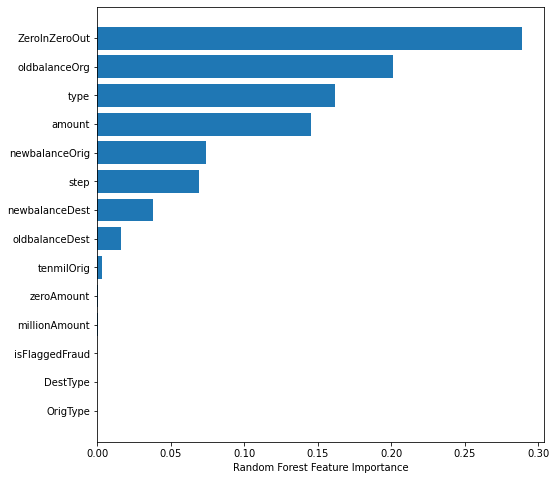

In [49]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
sorted_idx = rf_demo.feature_importances_.argsort()
plt.barh( features[sorted_idx],rf_demo.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### We can already see the value of our preprocessing with the zero in and zero out flag being a strong indicator of a frauduelent transaction.  

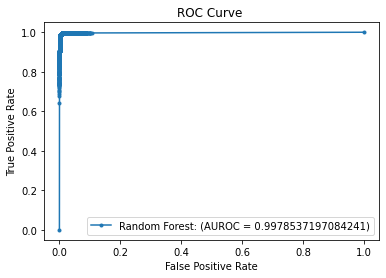

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score


rf_probs = rf_demo.predict_proba(val_transactions)
rf_probs = rf_probs[:,1]
rf_model_fpr, rf_model_tpr, _ = roc_curve(val_labels, rf_probs)
rf_auc = roc_auc_score(val_labels, rf_probs)

plt.title('ROC Curve ')
plt.plot(rf_model_fpr, rf_model_tpr, marker='.', label='Random Forest: (AUROC = ' + str(rf_auc) + ")")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### The ROC curve shows we quickly rocket up to an 80% true positive rate, but without any folse positives really, but that last 20% is slow and in trying to indentify that last bit of true positives we also flag a number of false positives.

Random Forest Average Precision: 0.9669086283116466


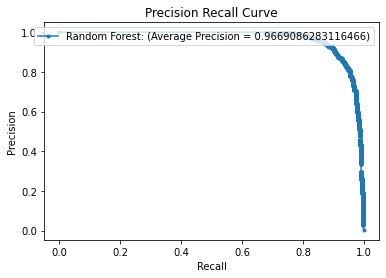

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


rf_avg_precision = average_precision_score(val_labels, rf_probs) 
print("Random Forest Average Precision: " + str(rf_avg_precision))
rf_precision, rf_recall, _ = precision_recall_curve(val_labels, rf_probs)


plt.title('Precision Recall Curve')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest: (Average Precision = ' + str(rf_avg_precision) + ")")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()



In [52]:
from sklearn.metrics import confusion_matrix


confusion_matrix(val_labels, predicted_val_labels)

array([[560631,     44],
       [   286,   1408]], dtype=int64)

#### It's here looking at precision recall tradeoff and at our confusion matrix where we see the shortcomings of this model. We missed 286 instances of fraud, which we can try to improve on.

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

### Implementing a weighted random forest model

#### We see that we're still missing a lot of fraud transactions even when allowing for trees to reach a greater depth and lowering our minimum samples per leaf down to 1. To nudge the random forest to focus on instances of fraud let's weight the classes accordingly 

In [ ]:
rf_weighted = RandomForestClassifier(bootstrap = False, class_weight = {0: 1, 1:1}, max_features=8, min_samples_leaf=1, 
                                 random_state=0, max_depth = 15, n_estimators = 40, n_jobs =-1)
rf_weighted.fit(train_transactions, train_labels)

X = val_transactions
predicted_val_labels = rf_weighted.predict(X)
f1 = f1_score(val_labels, predicted_val_labels, average = 'weighted')
print(f1)

In [57]:
from sklearn.metrics import confusion_matrix


confusion_matrix(val_labels, predicted_val_labels)

array([[560598,     77],
       [   367,   1327]], dtype=int64)

[Text(731.5531032256756, 533.1461538461539, 'ZeroInZeroOut <= 0.5\ngini = 0.006\nsamples = 1421741\nvalue = [2242989, 6483]'),
 Text(664.6936267206637, 512.2384615384616, 'tenmilOrig <= 0.5\ngini = 0.003\nsamples = 1418867\nvalue = [2241623, 3300]'),
 Text(663.7445126171909, 491.33076923076925, 'step <= 718.5\ngini = 0.003\nsamples = 1418786\nvalue = [2241623, 3166]'),
 Text(662.7953985137183, 470.42307692307696, 'zeroAmount <= 0.5\ngini = 0.003\nsamples = 1418720\nvalue = [2241623, 3069]'),
 Text(661.8462844102455, 449.5153846153846, 'oldbalanceOrg <= 1421474.125\ngini = 0.003\nsamples = 1418714\nvalue = [2241623, 3058]'),
 Text(539.8429586149631, 428.60769230769233, 'step <= 408.5\ngini = 0.002\nsamples = 1417412\nvalue = [2240343, 2299]'),
 Text(348.3999885888914, 407.70000000000005, 'oldbalanceOrg <= 1010777.281\ngini = 0.001\nsamples = 1338677\nvalue = [2116707, 1367]'),
 Text(170.04164975042633, 386.7923076923077, 'step <= 6.5\ngini = 0.001\nsamples = 1337795\nvalue = [2115365, 1

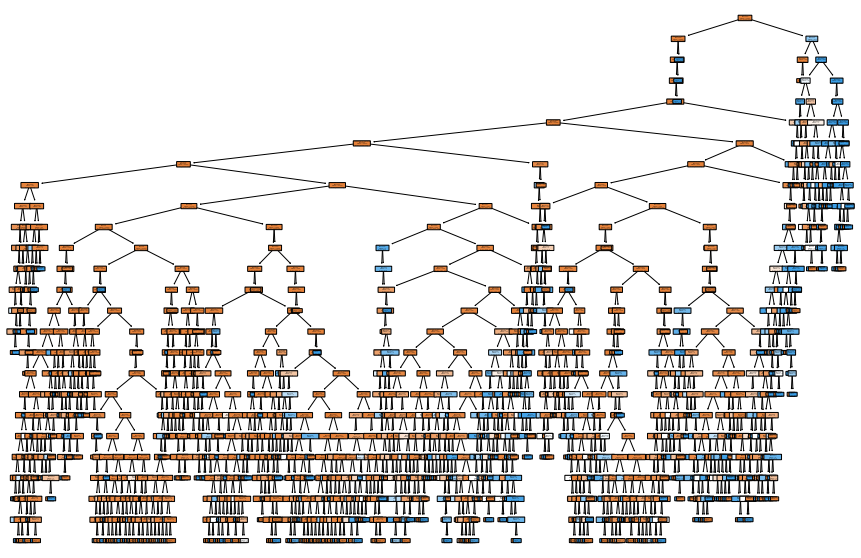

In [59]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))

plot_tree(rf_demo.estimators_[0], 
          feature_names=features,
          filled=True, impurity=True, 
          rounded=True)

### KNN Model

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(  train_transactions, train_labels)
predicted_val_labels = classifier.predict(val_transactions)
f1 = f1_score(val_labels, predicted_val_labels, average = 'weighted')
print(f1)

0.9989548285292894


In [64]:
from sklearn.metrics import confusion_matrix


confusion_matrix(val_labels, predicted_val_labels)

array([[560554,    121],
       [   438,   1256]], dtype=int64)

### Evaluating our Random Forest Model on Test

In [69]:

predicted_y_labels = rf_demo.predict(y_transactions)
f1 = f1_score(y_labels, predicted_y_labels, average = 'weighted')
rf_probs = rf_demo.predict_proba(y_transactions)
rf_probs = rf_probs[:,1]
rf_precision, rf_recall, _ = precision_recall_curve(val_labels, rf_probs)

print(f1)

0.9993906906203738


In [70]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_labels, predicted_y_labels)

array([[560631,     44],
       [   286,   1408]], dtype=int64)

Random Forest Average Precision: 0.9669086283116466


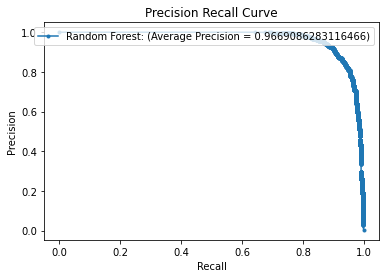

In [71]:
rf_avg_precision = average_precision_score(y_labels, rf_probs) 
print("Random Forest Average Precision: " + str(rf_avg_precision))
rf_precision, rf_recall, _ = precision_recall_curve(y_labels, rf_probs)


plt.title('Precision Recall Curve')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest: (Average Precision = ' + str(rf_avg_precision) + ")")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()



### Evaluating our Weighted Random Forest on Test

In [72]:
predicted_y_labels = rf_weighted.predict(y_transactions)
f1 = f1_score(y_labels, predicted_y_labels, average = 'weighted')
print(f1)

0.9991741233164478


In [74]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_labels, predicted_y_labels)

array([[560646,     29],
       [   408,   1286]], dtype=int64)

Random Forest Average Precision: 0.9669086283116466


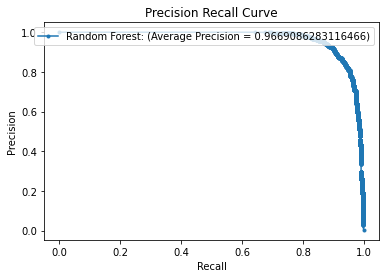

In [73]:
rf_avg_precision = average_precision_score(y_labels, rf_probs) 
print("Random Forest Average Precision: " + str(rf_avg_precision))
rf_precision, rf_recall, _ = precision_recall_curve(y_labels, rf_probs)


plt.title('Precision Recall Curve')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest: (Average Precision = ' + str(rf_avg_precision) + ")")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()



### Evaluating our KNN on Test

In [75]:
predicted_y_labels = classifier.predict(y_transactions)
f1 = f1_score(y_labels, predicted_y_labels, average = 'weighted')
print(f1)

0.9989548285292894


In [76]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_labels, predicted_y_labels)

array([[560554,    121],
       [   438,   1256]], dtype=int64)

KNN Average Precision: 0.7913256225046474


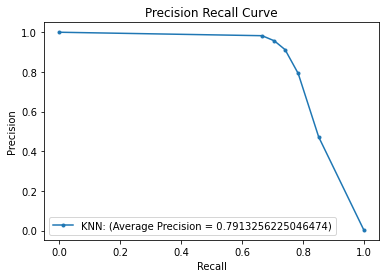

In [78]:
knn_probs = classifier.predict_proba(y_transactions)
knn_probs = knn_probs[:,1]

knn_avg_precision = average_precision_score(y_labels, knn_probs) 
print("KNN Average Precision: " + str(knn_avg_precision))
knn_precision, knn_recall, _ = precision_recall_curve(y_labels, knn_probs)


plt.title('Precision Recall Curve')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN: (Average Precision = ' + str(knn_avg_precision) + ")")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()